In [21]:
import random
from datasets import load_dataset, DatasetDict
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
num_files = 5535

num_files_to_sample = num_files * 0.001
num_files_to_sample

In [ ]:
file_numbers = random.sample(range(0,num_files), int(num_files_to_sample))
file_numbers

In [ ]:
#%%
# just a quick reminder of what the number formatting looks like
number = 35
f"{number:05d}"

In [ ]:
#%%
pattern = "data/train-{:05d}-of-05534-*"
# file_patterns = [pattern.format(x) for x in file_numbers]

# these patterns were randomly generated by the above statement
# saved them here for better cache 
file_patterns = ['data/train-01673-of-05534-*',
 'data/train-05053-of-05534-*',
 'data/train-01671-of-05534-*',
 'data/train-05424-of-05534-*',
 'data/train-02200-of-05534-*']
file_patterns

In [ ]:
data_sample = load_dataset(
    "tiiuae/falcon-refinedweb",
    data_files=file_patterns, ignore_verifications=True
)
df = pd.DataFrame(data_sample["train"])

In [ ]:
data_sample

In [ ]:
train_dataset = data_sample["train"]

rows = train_dataset[:50]

df = pd.DataFrame(rows)

df.to_csv("saved_rows.csv", index=False)


In [ ]:
from collections import Counter

df = pd.read_csv('saved_rows.csv')

def mcw(text):
    words = text.split()
    counter = Counter(words)
    commonWord, count = counter.most_common(1)[0]
    return commonWord, count

df['most_common_word'], df['word_count'] = zip(*df['content'].apply(mcw))
df

In [26]:
print(df[['most_common_word', 'word_count']])

   most_common_word  word_count
0                to           7
1               the          23
2                 -          16
3               the          14
4               the          16
5               The           7
6               for           3
7            mental          15
8               the           8
9                to           4
10               to          11
11               to          24
12              the          44
13               to          42
14              and          37
15             1974           3
16               to          11
17              the          21
18                a          10
19              the          26
20          content           3
21              the          14
22              and          17
23                a           2
24              and           9
25              the           9
26              and          14
27               is           5
28                a          16
29              the           5
30      

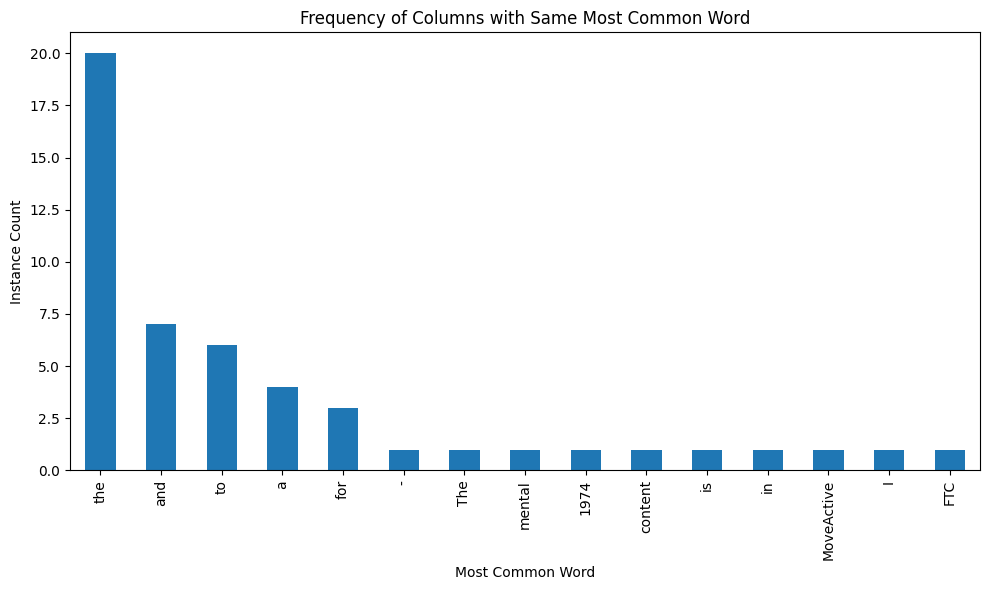

In [28]:
graphWordCount = df['most_common_word'].value_counts()

graphWordCount.plot(kind='bar')
plt.xlabel('Most Common Word')
plt.ylabel('Instance Count')
plt.title('Frequency of Columns with Same Most Common Word')
plt.tight_layout()
plt.show()